# Lab: Multi-Layer Perceptron

## 1. Load, Split, and Balance:

### 1.1 (1) Load the data into memory and save it to a pandas data frame. Do not normalize or one-hot encode any of the features until asked to do so later in the rubric. (2) Remove any observations that having missing data. (3) Encode any string data as integers for now. (4) You have the option of keeping the "county" variable or removing it. Be sure to discuss why you decided to keep/remove this variable:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

&emsp; In this part, we firstly loaded the dataset into memory and saved it as panda data frame:

In [2]:
df = pd.read_csv('acs2017_census_tract_data.csv')
df

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco Municipio,6011,3035,2976,99.7,0.3,0.0,0.0,...,0.5,0.0,3.6,26.9,1576,59.2,33.8,7.0,0.0,20.8
73997,72153750502,Puerto Rico,Yauco Municipio,2342,959,1383,99.1,0.9,0.0,0.0,...,0.0,0.0,1.3,25.3,666,58.4,35.4,6.2,0.0,26.3
73998,72153750503,Puerto Rico,Yauco Municipio,2218,1001,1217,99.5,0.2,0.0,0.0,...,3.4,0.0,3.4,23.5,560,57.5,34.5,8.0,0.0,23.0
73999,72153750601,Puerto Rico,Yauco Municipio,4380,1964,2416,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.1,1062,67.7,30.4,1.9,0.0,29.5


&emsp; In this part, we need to remove missing data exists:

(74001, 37)


<AxesSubplot:>

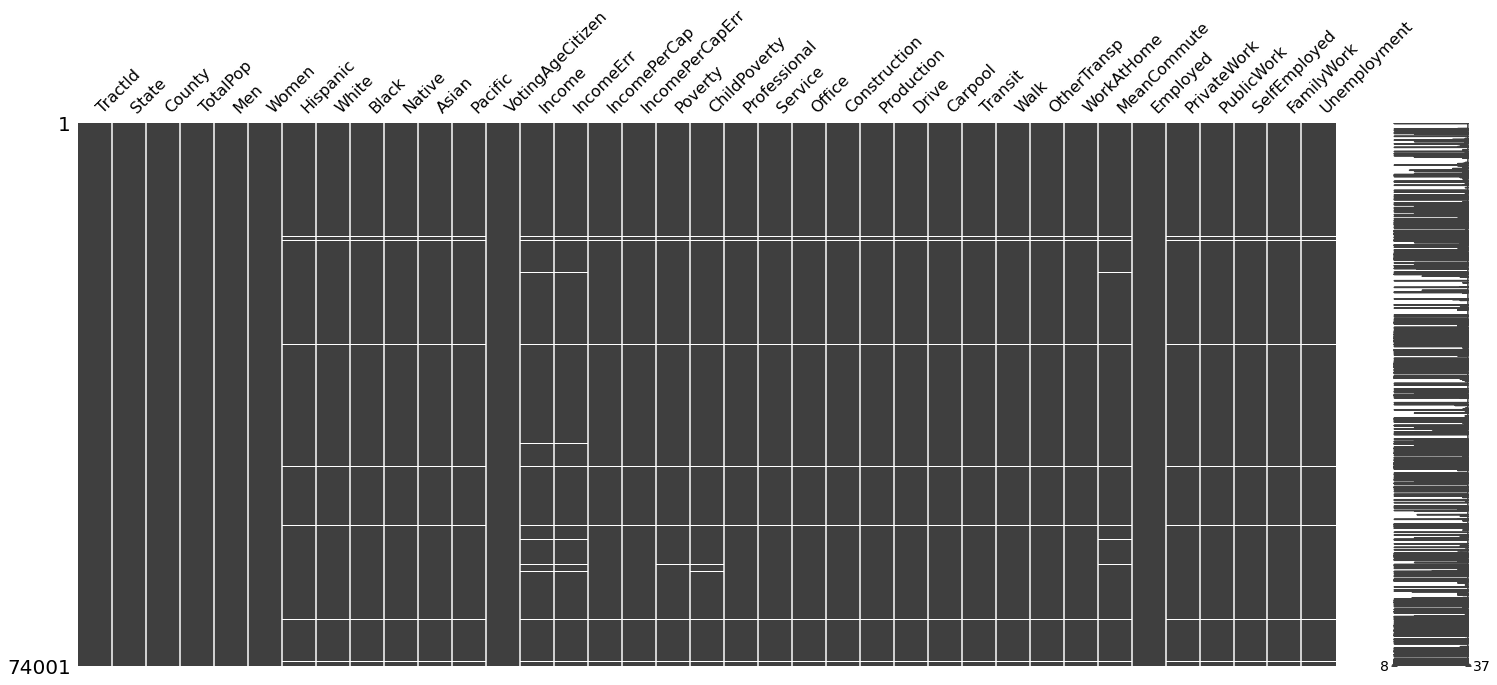

In [3]:
import missingno as mn

print(df.shape)
mn.matrix(df)

(72718, 37)


<AxesSubplot:>

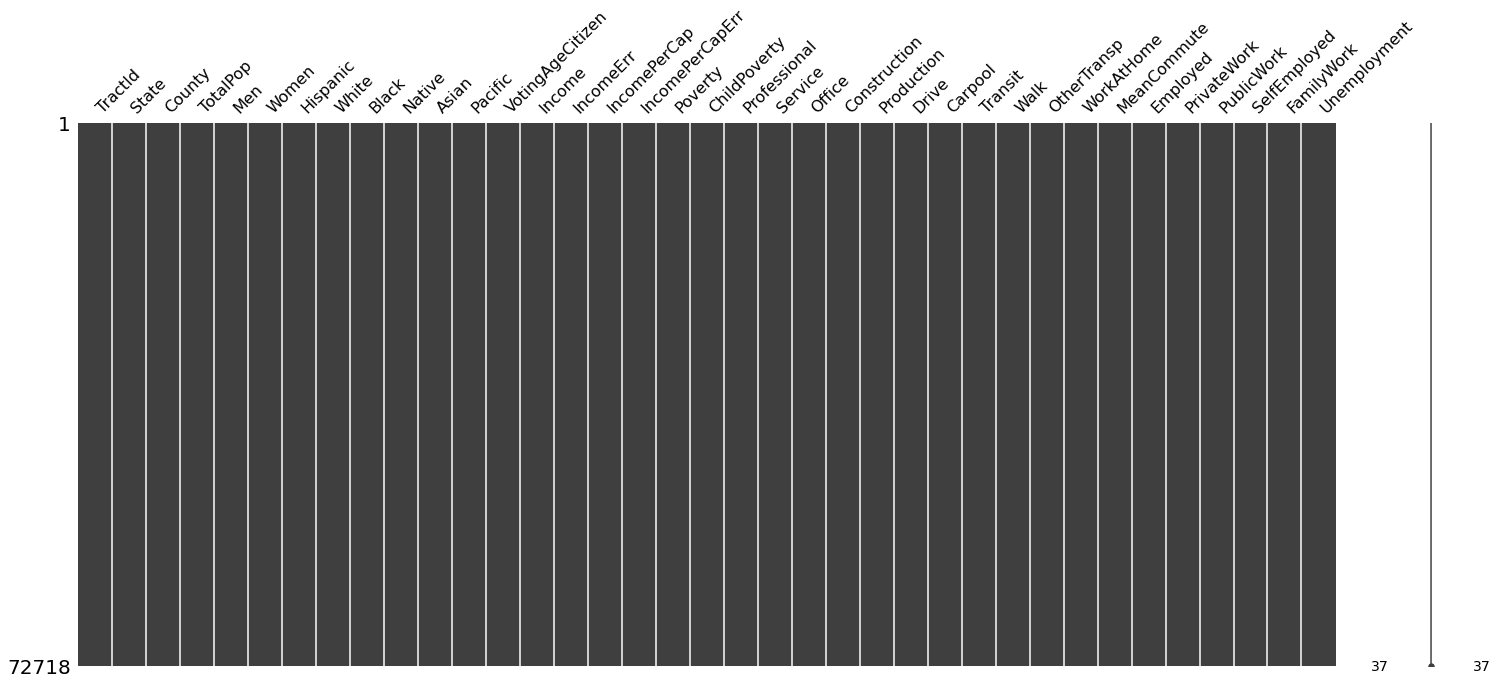

In [4]:
df = df.dropna()
df = df.drop_duplicates()
df = df.reset_index()
df = df.drop('index', axis= 1)
print(df.shape)
mn.matrix(df)

&emsp; As we can see from above, there are two variables which contain string data. They are variable 'State' and 'County'. 'State' and 'County' represent different regions of the United States. In addition, a state includes plenty of countys. These two variables are statistically conflicting. Therefore, we decide to remove variable 'County'. Since variable 'TractId' just represents numerical index of different regions and has no impact on our later work, it is removable.

In [5]:
df = df.drop(['TractId', 'County'], axis= 1)
df.head()

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,Alabama,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,Alabama,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,Alabama,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,Alabama,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [7]:
state_dict = {}
state_number = 0
state_array = []

for index in range(len(df)):
    if df['State'][index] not in state_dict:
        state_dict[df['State'][index]] = state_number
        state_number += 1
    state_array.append(state_dict[df['State'][index]])
df['State'] = state_array
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72718 entries, 0 to 72717
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             72718 non-null  int64  
 1   TotalPop          72718 non-null  int64  
 2   Men               72718 non-null  int64  
 3   Women             72718 non-null  int64  
 4   Hispanic          72718 non-null  float64
 5   White             72718 non-null  float64
 6   Black             72718 non-null  float64
 7   Native            72718 non-null  float64
 8   Asian             72718 non-null  float64
 9   Pacific           72718 non-null  float64
 10  VotingAgeCitizen  72718 non-null  int64  
 11  Income            72718 non-null  float64
 12  IncomeErr         72718 non-null  float64
 13  IncomePerCap      72718 non-null  float64
 14  IncomePerCapErr   72718 non-null  float64
 15  Poverty           72718 non-null  float64
 16  ChildPoverty      72718 non-null  float6

### 1.2 & 1.3 Balance the dataset and split the dataset:

&emsp; In this part, we will split the dataset into training set and testing set. Training set obtains 80 percent of the dataset. And Testing set obtains 20 percent of the dataset:

In [8]:
from sklearn.model_selection import train_test_split

y = df['ChildPoverty']
X = df.drop('ChildPoverty', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.2, random_state = 777)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((58174, 34), (14544, 34), (58174,), (14544,))

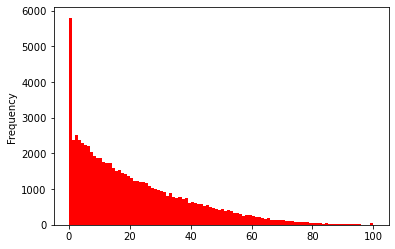

In [9]:
y.plot.hist(bins=100, color='red')
plt.show()

&emsp; We have found the average child provety rate in 2017 is 20.3% in website https://www.povertyusa.org/data/2017. It is a good reference for us to determine the boundary of every class. We decide to divided data into 4 categories according to different value of 'ChildPoverty'. The data whose 'ChildPoverty' values between 0 and 10 belong to class 'low'. The data whose 'ChildPoverty' values between 10 and 20 belong to class 'medium'. The data whose 'ChildPoverty' values between 20 and 30 belong to class 'high'. The data whose 'ChildPoverty' values exceeding 30 belong to class 'ex-high'.

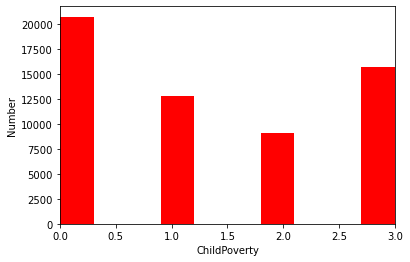

In [10]:
y_train = y_train.to_frame()
y_test = y_test.to_frame()

y_train = pd.cut(y_train['ChildPoverty'], [-1,10,20,30,100], labels = [0,1,2,3])
y_test = pd.cut(y_test['ChildPoverty'], [-1,10,20,30,100], labels = [0,1,2,3])

_, ax = plt.subplots()
ax.hist(y_train, bins=10, color='red')
ax.set_xlim(0, 3)
plt.xlabel("ChildPoverty")
plt.ylabel("Number")
plt.show()

&emsp; From the data distribution shown above, we can understand that our dataset is unbalanced. We decide to use SMOTE to do the oversampling. The number of instances belonging to the class 'high' is less than 10000. It will result in a undersampling situation.

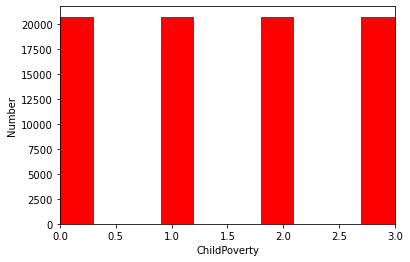

In [11]:
from imblearn.over_sampling import SMOTE

X_train, y_train = SMOTE().fit_resample(X_train,y_train)

_, ax = plt.subplots()
ax.hist(y_train, bins=10, color='red')
ax.set_xlim(0, 3)
plt.xlabel("ChildPoverty")
plt.ylabel("Number")
plt.show()

&emsp; In our opinion, training set should be balanced, yet testing set should not be modified. Training set will be used to train our model. An imbalanced train set means the data in this dataset is not equally distributed. It may result in potential risks when we using this training set to train model. However, it is unnecessary for us to balance the testing set. Because a test set is a group of data that represents the state of raw data in reality. If we want our test results to as realistic as possible, the test data should not be modified.

## 2. Pre-processing and Initial Modeling:

&emsp; In this part, we will implement four specific function in our two-layer perceptron network. They are vectorized gradient computation, mini-batching, cross entropy loss and proper Glorot initialization:

### 2.1 Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Do not normalize or one-hot encode the data (not yet). Be sure that training converges by graphing the loss function versus the number of epochs:

In [12]:
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0,size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden + 1)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden + 1)
        return W1, W2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        """
        A1 = self._add_bias_unit(X, how='column')
        A1 = A1.T
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)  # last layer sensitivity
        V1 = A2*(1-A2)*(W2.T @ V2) # back prop the sensitivity 
        
        grad2 = V2 @ A2.T # no bias on final layer
        grad1 = V1[1:,:] @ A1.T # dont back prop sensitivity of bias
        
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

In [13]:
from sklearn.metrics import accuracy_score
# just start with the vectorized version and minibatch
class TLPMiniBatch(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta / (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2)
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                # momentum calculations
                rho_W1, rho_W2 = eta * grad1, eta * grad2
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        return self

In [14]:
vals = { 'n_hidden':50, 
         'C':0.1, 'epochs':100, 'eta':0.1, 
         'alpha':0.1, 'decrease_const':0.1, 'minibatches':len(X_train)/32,
         'shuffle':True,'random_state':1}
nn_quad_1 = TLPMiniBatch(**vals)
%time nn_quad_1.fit(X_train.to_numpy(), y_train, print_progress=50)
yhat_1 = nn_quad_1.predict(X_test.to_numpy())
print(f'The accuracy is: {accuracy_score(y_test, yhat_1)}')

Epoch: 100/100

CPU times: total: 1min 35s
Wall time: 1min 4s
The accuracy is: 0.35224147414741475


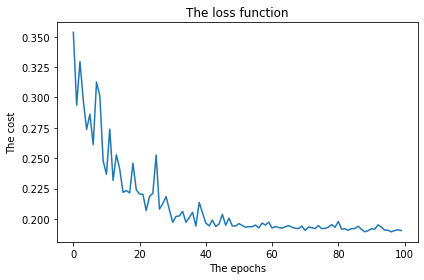

In [15]:
cost_avgs = [np.mean(x) for x in nn_quad_1.cost_]
plt.plot(range(len(cost_avgs)), cost_avgs)
plt.title('The loss function')
plt.ylabel('The cost')
plt.xlabel('The epochs')
plt.tight_layout()
plt.show()

### 2.2 Now (1) normalize the continuous numeric feature data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs:

In [16]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()
X_train_num_scaled  = norm.fit_transform(X_train[X_train.columns[1:]])
X_test_num_scaled = norm.transform(X_test[X_test.columns[1:]])

X_train_scaled = pd.DataFrame(X_train_num_scaled, 
                       index=X_train[X_train.columns[1:]].index, 
                       columns=X_train[X_train.columns[1:]].columns)
X_test_scaled = pd.DataFrame(X_test_num_scaled, 
                      index=X_test[X_test.columns[1:]].index, 
                      columns=X_test[X_test.columns[1:]].columns)

X_train.update(X_train_scaled)
X_test.update(X_test_scaled)

In [17]:
nn_quad_2 = TLPMiniBatch(**vals)
%time nn_quad_2.fit(X_train.to_numpy(), y_train, print_progress=50)
yhat_2 = nn_quad_2.predict(X_test.to_numpy())
print(f'The accuracy is: {accuracy_score(y_test, yhat_2)}')

Epoch: 100/100

CPU times: total: 1min 18s
Wall time: 53.8 s
The accuracy is: 0.537472497249725


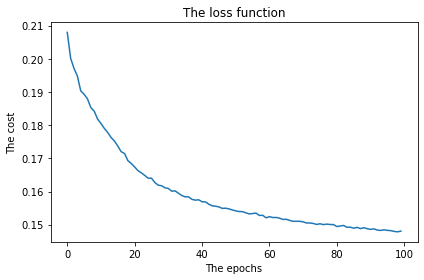

In [18]:
cost_avgs = [np.mean(x) for x in nn_quad_2.cost_]
plt.plot(range(len(cost_avgs)), cost_avgs)
plt.title('The loss function')
plt.ylabel('The cost')
plt.xlabel('The epochs')
plt.tight_layout()
plt.show()

### 2.3 Now(1) normalize the continuous numeric feature data AND (2) one hot encode the categorical data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs:

In [19]:
onehot_X_train = pd.get_dummies(X_train['State'])
X_train = X_train.drop(['State'], axis=1)
X_train = pd.concat([onehot_X_train, X_train], axis=1)

onehot_X_test = pd.get_dummies(X_test['State'])
X_test = X_test.drop(['State'], axis=1)
X_test = pd.concat([onehot_X_test, X_test], axis=1)

In [20]:
nn_quad_3 = TLPMiniBatch(**vals)
%time nn_quad_3.fit(X_train.to_numpy(), y_train, print_progress=50)
yhat_3 = nn_quad_3.predict(X_test.to_numpy())
print(f'The accuracy is: {accuracy_score(y_test, yhat_3)}')

Epoch: 100/100

CPU times: total: 2min 39s
Wall time: 1min 12s
The accuracy is: 0.6881875687568757


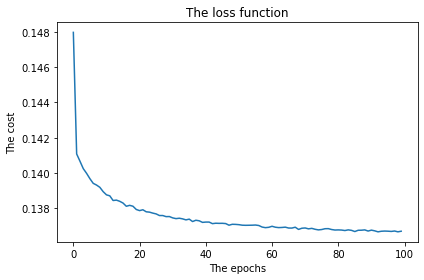

In [21]:
cost_avgs = [np.mean(x) for x in nn_quad_3.cost_]
plt.plot(range(len(cost_avgs)), cost_avgs)
plt.title('The loss function')
plt.ylabel('The cost')
plt.xlabel('The epochs')
plt.tight_layout()
plt.show()

### 2.4 Compare the performance of the three models you just trained. Are there any meaningful differences in performance? Explain, in your own words, why these models have (or do not have) different performances:

&emsp; In this part, we decide to use McNemar's Test to compare the prediction result of our models. More details could be found in website http://rasbt.github.io/mlxtend/user_guide/evaluate/mcnemar/. The McNemar's Test will output a chi-squared value of two models. The higher the value, the greater the difference in performance between the two models. The chi-squared value can be compute as fellow:
$$ χ^2 = \frac{(|B−C|-1)^2}{(B+C)} $$
The variable b represents the number of data predicted correctly by Model 1 but incorrectly by Model 2. The variable c represents the number of data predicted correctly by Model 2 but incorrectly by Model 1.

|  Confidence   | 0.90  |  0.95   | 0.99  |
|  :----:  | :----:  |  :----:  | :----:  |
| 1 DOF, Critical Value  | 2.706 | 3.841  | 6.635 |

In [22]:
from mlxtend.evaluate import mcnemar, mcnemar_table

tb_12 = mcnemar_table(y_target=y_test, 
                   y_model1=yhat_1, 
                   y_model2=yhat_2)
chi2_12, p = mcnemar(ary=tb_12, corrected=True)
print(f'The model 1 & the model 2: chi-squared {chi2_12}')

tb_13 = mcnemar_table(y_target=y_test, 
                   y_model1=yhat_1, 
                   y_model2=yhat_3)
chi2_13, p = mcnemar(ary=tb_13, corrected=True)
print(f'The model 1 & the model 3: chi-squared {chi2_13}')

tb_23 = mcnemar_table(y_target=y_test, 
                   y_model1=yhat_2, 
                   y_model2=yhat_3)
chi2_23, p = mcnemar(ary=tb_23, corrected=True)
print(f'The model 2 & the model 3: chi-squared {chi2_23}')

The model 1 & the model 2: chi-squared 1720.1729127134724
The model 1 & the model 3: chi-squared 3543.692456192456
The model 2 & the model 3: chi-squared 1013.6150760135135


&emsp; As we can see from the chi-sequared value of between each two models, the performance of every model is quite different. We believe the performance differences are meaningful. Because the performance of model has been improved by using extra efficient techniques. We didn't use any extra technique in model 1, yet we used extra techniques in model 2 and 3. For model 2, we use normalizing as our extra technique. And we used both normalizing and one hot encoding as extra techniques in model 3.<br>
&emsp; Useing normalization, the value of the numerical column in the dataset will be changed, so that a common scale is used to avoid distorting the difference in the value range or losing information. Therefore, it is easy to say that the performance had been improved from model 1 to model 2.<br>
&emsp; Using one hot encoding, we can map discrete data, such as string data, into the numeric space. Then, these numeric data corresponding to the original string data will be used for distance calculations. It will contribute to more accurate results. Therefore, it is easy to say that the performance had been improved from model 2 to model 3.<br>
&emsp; These chi-squared values all are greater than 6.635, so the difference in performance among these models is enormous.

## 3. Modeling:

### 3.1 Add support for a third layer in the multi-layer perceptron:

In [23]:
from numpy import linalg as LA

class ThreeLayerPerceptron(TLPMiniBatch):
    def __init__(self, **kwds):
        super().__init__(**kwds)

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        init_bound_1 = 4*np.sqrt(6 / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound_1, init_bound_1, (self.n_hidden, self.n_features_ + 1))
        W1[:,:1] = 0
        
        init_bound_2 = 4*np.sqrt(6 / (self.n_hidden + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound_2, init_bound_2, (self.n_hidden, self.n_hidden + 1))
        W2[:,:1] = 0
        
        init_bound_3 = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden + 1))
        W3 = np.random.uniform(-init_bound_3, init_bound_3, (self.n_output_, self.n_hidden + 1))
        W3[:,:1] = 0
        
        return W1, W2, W3
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + 
                                       np.mean(W2[:, 1:] ** 2) + 
                                       np.mean(W3[:, 1:] ** 2))
    
    def _cost(self,A4,Y_enc,W1,W2,W3):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A4)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, W3):
        """Compute feedforward step
        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        
        A4 = self._sigmoid(Z3)
        
        return A1, Z1, A2, Z2, A3, Z3, A4
    
    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V3 = -2*(Y_enc-A4)*A4*(1-A4)  # last layer sensitivity
        V2 = A3*(1-A3)*(W3.T @ V3) # back prop the sensitivity
        V1 = A2*(1-A2)*(W2.T @ V2[1:,:])
        
        grad3 = V3 @ A3.T # no bias on final layer
        grad2 = V2[1:,:] @ A2.T # dont back prop sensitivity of bias
        grad1 = V1[1:,:] @ A1.T
        
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C

        return grad1, grad2, grad3
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, A4 = self._feedforward(X, self.W1, self.W2, self.W3)
        y_pred = np.argmax(A4, axis=0)
        return y_pred
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        
        self.grad_W1, self.grad_W2, self.grad_W3 = [], [], []
        self.grad_total = []
        
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta / (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            
            grad_current_W1, grad_current_W2, grad_current_W3 = [], [], []
            
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X_data[idx],
                                                               self.W1,
                                                               self.W2,
                                                               self.W3)
                
                cost = self._cost(A4,Y_enc[:, idx],self.W1,self.W2,self.W3)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, 
                                                         Z1=Z1, Z2=Z2, Z3=Z3, Y_enc=Y_enc[:, idx],
                                                         W1=self.W1,W2=self.W2,W3=self.W3)

#                 grad_current_W1.append(LA.norm(np.abs(grad1)))
#                 grad_current_W2.append(LA.norm(np.abs(grad2)))
#                 grad_current_W3.append(LA.norm(np.abs(grad3)))
                
                grad_current_W1.append(np.mean(np.abs(grad1)))
                grad_current_W2.append(np.mean(np.abs(grad2)))
                grad_current_W3.append(np.mean(np.abs(grad3)))
                
                # momentum calculations
                rho_W1, rho_W2, rho_W3 = eta * grad1, eta * grad2, eta * grad3
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                rho_W1_prev, rho_W2_prev, rho_W3_prev = rho_W1, rho_W2, rho_W3

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        
#             self.grad_W1.append(LA.norm(np.abs(grad_current_W1)))
#             self.grad_W2.append(LA.norm(np.abs(grad_current_W2)))
#             self.grad_W3.append(LA.norm(np.abs(grad_current_W3)))
            
            self.grad_W1.append(np.mean(np.abs(grad_current_W1)))
            self.grad_W2.append(np.mean(np.abs(grad_current_W2)))
            self.grad_W3.append(np.mean(np.abs(grad_current_W3)))
        
        self.grad_total.append(self.grad_W1)
        self.grad_total.append(self.grad_W2)
        self.grad_total.append(self.grad_W3)
            
        return self

In [24]:
vals = { 'n_hidden':50, 
         'C':0.1, 'epochs':100, 'eta':0.01, 
         'alpha':0.01, 'decrease_const':0.1, 'minibatches':100,
         'shuffle':True,'random_state':1}

In [25]:
nn_quad_4 = ThreeLayerPerceptron(**vals)
%time nn_quad_4.fit(X_train.to_numpy(), y_train, print_progress=50)
yhat_4 = nn_quad_4.predict(X_test.to_numpy())
print(f'The accuracy is: {accuracy_score(y_test, yhat_4)}')

Epoch: 100/100

CPU times: total: 1min 34s
Wall time: 44.7 s
The accuracy is: 0.7330170517051705


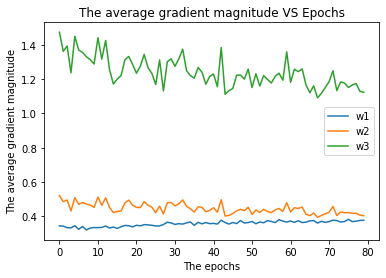

In [26]:
ax = plt.subplot(1, 1, 1)
for i in range(len(nn_quad_4.grad_total)):
    plt.plot(np.abs(nn_quad_4.grad_total[i][20:]), label=f'w{i+1}')
plt.legend()
plt.title('The average gradient magnitude VS Epochs')
plt.ylabel('The average gradient magnitude')
plt.xlabel('The epochs')
plt.show()

In [27]:
tb_34 = mcnemar_table(y_target=y_test, 
                   y_model1=yhat_3, 
                   y_model2=yhat_4)
chi2_34, _ = mcnemar(ary=tb_34, corrected=True)
print(f'The model 3 & the model 4: chi-squared {chi2_34}')

The model 3 & the model 4: chi-squared 170.8875


&emsp; The chi-squared value is greater than 6.635, so the difference in performance between the two-layer model and the three-layer model is enormous. As a result, the three-layer model is greater than the two-layer model.

### 3.2 Adding support for a fourth layer:

In [28]:
class FourLayerPerceptron(ThreeLayerPerceptron):
    def __init__(self, **kwds):
        super().__init__(**kwds)

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        init_bound_1 = 4*np.sqrt(6 / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound_1, init_bound_1, (self.n_hidden, self.n_features_ + 1))
        W1[:,:1] = 0
        
        init_bound_2 = 4*np.sqrt(6 / (self.n_hidden + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound_2, init_bound_2, (self.n_hidden, self.n_hidden + 1))
        W2[:,:1] = 0
        
        init_bound_3 = 4*np.sqrt(6 / (self.n_hidden + self.n_hidden + 1))
        W3 = np.random.uniform(-init_bound_3, init_bound_3, (self.n_hidden, self.n_hidden + 1))
        W3[:,:1] = 0
        
        init_bound_4 = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden + 1))
        W4 = np.random.uniform(-init_bound_4, init_bound_4, (self.n_output_, self.n_hidden + 1))
        W4[:,:1] = 0
        
        return W1, W2, W3, W4
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + 
                                       np.mean(W2[:, 1:] ** 2) + 
                                       np.mean(W3[:, 1:] ** 2) + 
                                       np.mean(W4[:, 1:] ** 2))
    
    def _cost(self,A5,Y_enc,W1,W2,W3,W4):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A5)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, W3, W4):
        """Compute feedforward step
        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        
        A4 = self._sigmoid(Z3)
        A4 = self._add_bias_unit(A4, how='row')
        Z4 = W4 @ A4
        
        A5 = self._sigmoid(Z4)
        
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5
    
    def _get_gradient(self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V4 = -2*(Y_enc-A5)*A5*(1-A5)  # last layer sensitivity
        V3 = A4*(1-A4)*(W4.T @ V4) # back prop the sensitivity
        V2 = A3*(1-A3)*(W3.T @ V3[1:,:])
        V1 = A2*(1-A2)*(W2.T @ V2[1:,:])
        
        grad4 = V4 @ A4.T # no bias on final layer
        grad3 = V3[1:,:] @ A3.T # dont back prop sensitivity of bias
        grad2 = V2[1:,:] @ A2.T
        grad1 = V1[1:,:] @ A1.T
        
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C
        grad4[:, 1:] += W4[:, 1:] * self.l2_C

        return grad1, grad2, grad3, grad4
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, A5 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4)
        y_pred = np.argmax(A5, axis=0)
        return y_pred
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3 ,self.W4 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)
        rho_W4_prev = np.zeros(self.W4.shape)

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        
        self.grad_W1, self.grad_W2, self.grad_W3, self.grad_W4 = [], [], [], []
        self.grad_total = []
        
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta / (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            
            grad_current_W1, grad_current_W2, grad_current_W3, grad_current_W4 = [], [], [], []
            
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5 = self._feedforward(X_data[idx],
                                                                       self.W1,
                                                                       self.W2,
                                                                       self.W3,
                                                                       self.W4)
                
                cost = self._cost(A5,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3, grad4 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, 
                                                         Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, 
                                                         Y_enc=Y_enc[:, idx],
                                                         W1=self.W1,W2=self.W2,W3=self.W3,W4=self.W4)
                
                grad_current_W1.append(np.mean(np.abs(grad1)))
                grad_current_W2.append(np.mean(np.abs(grad2)))
                grad_current_W3.append(np.mean(np.abs(grad3)))
                grad_current_W4.append(np.mean(np.abs(grad4)))
                
                # momentum calculations
                rho_W1, rho_W2, rho_W3, rho_W4 = eta * grad1, eta * grad2, eta * grad3, eta * grad4
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev))
                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev = rho_W1, rho_W2, rho_W3, rho_W4

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
            self.grad_W1.append(np.mean(np.abs(grad_current_W1)))
            self.grad_W2.append(np.mean(np.abs(grad_current_W2)))
            self.grad_W3.append(np.mean(np.abs(grad_current_W3)))
            self.grad_W4.append(np.mean(np.abs(grad_current_W4)))
        
        self.grad_total.append(self.grad_W1)
        self.grad_total.append(self.grad_W2)
        self.grad_total.append(self.grad_W3)
        self.grad_total.append(self.grad_W4)
            
        return self

In [29]:
nn_quad_5 = FourLayerPerceptron(**vals)
%time nn_quad_5.fit(X_train.to_numpy(), y_train, print_progress=50)
yhat_5 = nn_quad_5.predict(X_test.to_numpy())
print(f'The accuracy is: {accuracy_score(y_test, yhat_5)}')

Epoch: 100/100

CPU times: total: 2min 6s
Wall time: 1min
The accuracy is: 0.7367299229922992


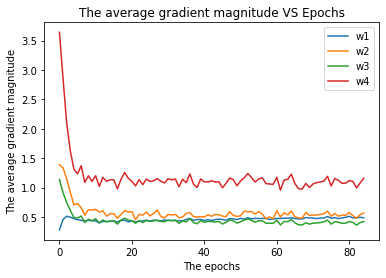

In [30]:
ax = plt.subplot(1, 1, 1)
for i in range(len(nn_quad_5.grad_total)):
    plt.plot(np.abs(nn_quad_5.grad_total[i][15:]), label=f'w{i+1}')
plt.legend()
plt.title('The average gradient magnitude VS Epochs')
plt.ylabel('The average gradient magnitude')
plt.xlabel('The epochs')
plt.show()

In [31]:
tb_45 = mcnemar_table(y_target=y_test, 
                   y_model1=yhat_4, 
                   y_model2=yhat_5)
chi2_45, _ = mcnemar(ary=tb_45, corrected=True)
print(f'The model 4 & the model 5: chi-squared {chi2_45}')

The model 4 & the model 5: chi-squared 4.826460481099656


&emsp; The chi-squared value is less to 6.635, so the difference in performance between the four-layer model and the three-layer model is small. As a result, the four-layer model is similar to the three-layer model.

### 3.3 Adding support for a fifth layer:

In [32]:
class FiveLayerPerceptron(ThreeLayerPerceptron):
    def __init__(self, **kwds):
        super().__init__(**kwds)

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        init_bound_1 = 4*np.sqrt(6 / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound_1, init_bound_1, (self.n_hidden, self.n_features_ + 1))
        W1[:,:1] = 0
        
        init_bound_2 = 4*np.sqrt(6 / (self.n_hidden + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound_2, init_bound_2, (self.n_hidden, self.n_hidden + 1))
        W2[:,:1] = 0
        
        init_bound_3 = 4*np.sqrt(6 / (self.n_hidden + self.n_hidden + 1))
        W3 = np.random.uniform(-init_bound_3, init_bound_3, (self.n_hidden, self.n_hidden + 1))
        W3[:,:1] = 0
        
        init_bound_4 = 4*np.sqrt(6 / (self.n_hidden + self.n_hidden + 1))
        W4 = np.random.uniform(-init_bound_4, init_bound_4, (self.n_hidden, self.n_hidden + 1))
        W4[:,:1] = 0
        
        init_bound_5 = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden + 1))
        W5 = np.random.uniform(-init_bound_5, init_bound_5, (self.n_output_, self.n_hidden + 1))
        W5[:,:1] = 0
        
        return W1, W2, W3, W4, W5
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + 
                                       np.mean(W2[:, 1:] ** 2) + 
                                       np.mean(W3[:, 1:] ** 2) + 
                                       np.mean(W4[:, 1:] ** 2) + 
                                       np.mean(W5[:, 1:] ** 2))
    
    def _cost(self,A6,Y_enc,W1,W2,W3,W4,W5):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A6)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, W3, W4, W5):
        """Compute feedforward step
        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        
        A4 = self._sigmoid(Z3)
        A4 = self._add_bias_unit(A4, how='row')
        Z4 = W4 @ A4
        
        A5 = self._sigmoid(Z4)
        A5 = self._add_bias_unit(A5, how='row')
        Z5 = W5 @ A5
        
        A6 = self._sigmoid(Z5)
        
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6
    
    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V5 = -2*(Y_enc-A6)*A6*(1-A6)  # last layer sensitivity
        V4 = A5*(1-A5)*(W5.T @ V5) # back prop the sensitivity
        V3 = A4*(1-A4)*(W4.T @ V4[1:,:])
        V2 = A3*(1-A3)*(W3.T @ V3[1:,:])
        V1 = A2*(1-A2)*(W2.T @ V2[1:,:])
        
        grad5 = V5 @ A5.T # no bias on final layer
        grad4 = V4[1:,:] @ A4.T
        grad3 = V3[1:,:] @ A3.T # dont back prop sensitivity of bias
        grad2 = V2[1:,:] @ A2.T
        grad1 = V1[1:,:] @ A1.T
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C
        grad4[:, 1:] += W4[:, 1:] * self.l2_C
        grad5[:, 1:] += W5[:, 1:] * self.l2_C

        return grad1, grad2, grad3, grad4, grad5
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, _, _, A6 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.W5)
        y_pred = np.argmax(A6, axis=0)
        return y_pred
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3 ,self.W4 ,self.W5 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)
        rho_W4_prev = np.zeros(self.W4.shape)
        rho_W5_prev = np.zeros(self.W5.shape)

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        
        self.grad_W1, self.grad_W2, self.grad_W3, self.grad_W4, self.grad_W5 = [], [], [], [], []
        self.grad_total = []
        
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta / (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            
            grad_current_W1, grad_current_W2, grad_current_W3, grad_current_W4, grad_current_W5 = [], [], [], [], []
            
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx],
                                                                               self.W1,
                                                                               self.W2,
                                                                               self.W3,
                                                                               self.W4,
                                                                               self.W5)
                
                cost = self._cost(A6,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4,self.W5)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3, grad4, grad5 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, A6=A6, 
                                                         Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, Z5=Z5,
                                                         Y_enc=Y_enc[:, idx],
                                                         W1=self.W1,W2=self.W2,W3=self.W3,W4=self.W4,W5=self.W5)
                
                grad_current_W1.append(np.mean(np.abs(grad1)))
                grad_current_W2.append(np.mean(np.abs(grad2)))
                grad_current_W3.append(np.mean(np.abs(grad3)))
                grad_current_W4.append(np.mean(np.abs(grad4)))
                grad_current_W5.append(np.mean(np.abs(grad5)))
                
                # momentum calculations
                rho_W1, rho_W2, rho_W3, rho_W4, rho_W5 = eta * grad1, eta * grad2, eta * grad3, eta * grad4, eta * grad5
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev))
                self.W5 -= (rho_W5 + (self.alpha * rho_W5_prev))
                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev, rho_W5_prev = rho_W1, rho_W2, rho_W3, rho_W4, rho_W5

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
            self.grad_W1.append(np.mean(np.abs(grad_current_W1)))
            self.grad_W2.append(np.mean(np.abs(grad_current_W2)))
            self.grad_W3.append(np.mean(np.abs(grad_current_W3)))
            self.grad_W4.append(np.mean(np.abs(grad_current_W4)))
            self.grad_W5.append(np.mean(np.abs(grad_current_W5)))
        
        self.grad_total.append(self.grad_W1)
        self.grad_total.append(self.grad_W2)
        self.grad_total.append(self.grad_W3)
        self.grad_total.append(self.grad_W4)
        self.grad_total.append(self.grad_W5)
            
        return self

In [33]:
nn_quad_6 = FiveLayerPerceptron(**vals)
%time nn_quad_6.fit(X_train.to_numpy(), y_train, print_progress=50)
yhat_6 = nn_quad_6.predict(X_test.to_numpy())
print(f'The accuracy is: {accuracy_score(y_test, yhat_6)}')

Epoch: 100/100

CPU times: total: 2min 40s
Wall time: 1min 17s
The accuracy is: 0.7312293729372937


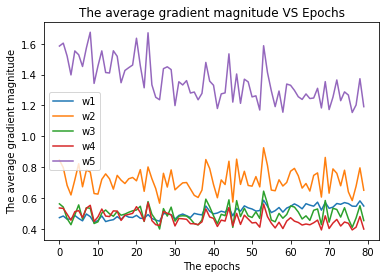

In [34]:
ax = plt.subplot(1, 1, 1)
for i in range(len(nn_quad_6.grad_total)):
    plt.plot(np.abs(nn_quad_6.grad_total[i][20:]), label=f'w{i+1}')
plt.legend()
plt.title('The average gradient magnitude VS Epochs')
plt.ylabel('The average gradient magnitude')
plt.xlabel('The epochs')
plt.show()

In [35]:
tb_46 = mcnemar_table(y_target=y_test, 
                   y_model1=yhat_4, 
                   y_model2=yhat_6)
chi2_46, _ = mcnemar(ary=tb_46, corrected=True)
print(f'The model 4 & the model 6: chi-squared {chi2_46}')

The model 4 & the model 6: chi-squared 0.9498480243161094


&emsp; The chi-squared value is less to 6.635, so the difference in performance between the five-layer model and the three-layer model is small. As a result, the five-layer model is similar to the three-layer model.

### 3.4 Implement an adaptive learning technique that was discussed in lecture and use it on the five layer network:

&emsp; We choose AdaGrad adaptive learning technique:

&emsp; Because of:

$$ \mathbf{W}_{k+1} = \mathbf{W}_{k} - η {ρ}_{k} $$

&emsp; Where:

$$ {ρ}_{k} = \frac{1}{\sqrt{\mathbf{G}_{k}+ϵ}} ⊙ ∇J(\mathbf{W_k}) $$

$$ \mathbf{G}_{k} = \mathbf{G}_{k-1} +  ∇J(\mathbf{W_k}) ⊙ ∇J(\mathbf{W_k}) $$

In [36]:
class FiveLayerPerceptronAdaGrad(FiveLayerPerceptron):
    def __init__(self, **kwds):
        super().__init__(**kwds)

    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3 ,self.W4 ,self.W5 = self._initialize_weights()

        g_w1 = np.zeros(self.W1.shape)
        g_w2 = np.zeros(self.W2.shape)
        g_w3 = np.zeros(self.W3.shape)
        g_w4 = np.zeros(self.W4.shape)
        g_w5 = np.zeros(self.W5.shape)
        
        current_epsilon = 1e-8

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        
        self.grad_W1, self.grad_W2, self.grad_W3, self.grad_W4, self.grad_W5 = [], [], [], [], []
        self.grad_total = []
        
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta / (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            
            grad_current_W1, grad_current_W2, grad_current_W3, grad_current_W4, grad_current_W5 = [], [], [], [], []
                                            
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx],
                                                                               self.W1,
                                                                               self.W2,
                                                                               self.W3,
                                                                               self.W4,
                                                                               self.W5)
                
                cost = self._cost(A6,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4,self.W5)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3, grad4, grad5 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, A6=A6, 
                                                         Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, Z5=Z5,
                                                         Y_enc=Y_enc[:, idx],
                                                         W1=self.W1,W2=self.W2,W3=self.W3,W4=self.W4,W5=self.W5)
                
                g_w1 += grad1 * grad1
                self.W1 -= self.eta * grad1 / np.sqrt(g_w1 + current_epsilon)
                
                g_w2 += grad2 * grad2
                self.W2 -= self.eta * grad2 / np.sqrt(g_w2 + current_epsilon)
                
                g_w3 += grad3 * grad3
                self.W3 -= self.eta * grad3 / np.sqrt(g_w3 + current_epsilon)
                
                g_w4 += grad4 * grad4
                self.W4 -= self.eta * grad4 / np.sqrt(g_w4 + current_epsilon)
                
                g_w5 += grad5 * grad5
                self.W5 -= self.eta * grad5 / np.sqrt(g_w5 + current_epsilon)
                
                grad_current_W1.append(np.mean(np.abs(grad1)))
                grad_current_W2.append(np.mean(np.abs(grad2)))
                grad_current_W3.append(np.mean(np.abs(grad3)))
                grad_current_W4.append(np.mean(np.abs(grad4)))
                grad_current_W5.append(np.mean(np.abs(grad5)))

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
            self.grad_W1.append(np.mean(np.abs(grad_current_W1)))
            self.grad_W2.append(np.mean(np.abs(grad_current_W2)))
            self.grad_W3.append(np.mean(np.abs(grad_current_W3)))
            self.grad_W4.append(np.mean(np.abs(grad_current_W4)))
            self.grad_W5.append(np.mean(np.abs(grad_current_W5)))
        
        self.grad_total.append(self.grad_W1)
        self.grad_total.append(self.grad_W2)
        self.grad_total.append(self.grad_W3)
        self.grad_total.append(self.grad_W4)
        self.grad_total.append(self.grad_W5)
            
        return self

In [37]:
nn_quad_7 = FiveLayerPerceptronAdaGrad(**vals)
%time nn_quad_7.fit(X_train.to_numpy(), y_train, print_progress=50)
yhat_7 = nn_quad_7.predict(X_test.to_numpy())
print(f'The accuracy is: {accuracy_score(y_test, yhat_7)}')

Epoch: 100/100

CPU times: total: 2min 47s
Wall time: 1min 16s
The accuracy is: 0.7316419141914191


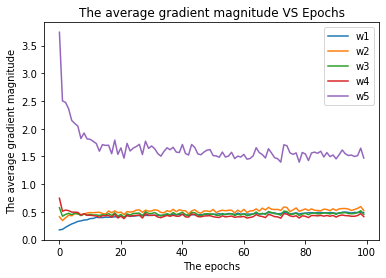

In [38]:
ax = plt.subplot(1, 1, 1)
for i in range(len(nn_quad_7.grad_total)):
    plt.plot(np.abs(nn_quad_7.grad_total[i]), label=f'w{i+1}')
plt.legend()
plt.title('The average gradient magnitude VS Epochs')
plt.ylabel('The average gradient magnitude')
plt.xlabel('The epochs')
plt.show()

In [39]:
tb_67 = mcnemar_table(y_target=y_test, 
                   y_model1=yhat_6, 
                   y_model2=yhat_7)
chi2_67, _ = mcnemar(ary=tb_67, corrected=True)
print(f'The model 6 & the model 7: chi-squared {chi2_67}')

The model 6 & the model 7: chi-squared 0.03026634382566586


&emsp; The chi-squared value is less to 6.635, so the difference in performance between the five-layer model and the five-layer model with AdaGrad is small. As a result, the five-layer model is similar to the five-layer model with AdaGrad.

&emsp; From the chi-squared value shown above, we can conduct that there is little performance difference between five layer model with and without the adaptive learning strategy. However, from the 'The average gradient magnitude VS Epochs' graph, we only need approximately 10 epochs to obtain a stable average gradient magnitude if we implement an adaptive learning technique in five layer model. If we don't implement an adaptive learning technique, the average gradient magnitude will be ripidly changed around 20 epochs. It represents that there will be less epochs required to obtain stable high accuracy if we implement an adaptive learning technique in five layer model.

## 4. Exceptional Work:

&emsp; Because of:

$$ \mathbf{M}_{k} = {β}_{1} \mathbf{M}_{k-1} + (1 - {β}_{1}) ∇J(\mathbf{W}_{k}) $$
$$ \mathbf{V}_{k} = {β}_{2} \mathbf{V}_{k-1} + (1 - {β}_{2}) ∇J(\mathbf{W}_{k})⊙∇J(\mathbf{W}_{k})$$
$$ \mathbf{\hat{M}}_{k} = \frac{\mathbf{M}_{k}}{1 - β_{1}^{k}} $$
$$ \mathbf{\hat{V}}_{k} = \frac{\mathbf{V}_{k}}{1 - β_{2}^{k}} $$
$$ \mathbf{W}_{k} = \mathbf{W}_{k-1} - η \frac{\mathbf{\hat{M}}_{k}}{\sqrt{\mathbf{\hat{V}}_{k}+ϵ}} $$

&emsp; Where:

$$ {β}_{1} = 0.9 $$
$$ {β}_{2} = 0.999 $$
$$ {ϵ} = {10}^{-8} $$

In [40]:
class FiveLayerPerceptronAdaM(FiveLayerPerceptron):
    def __init__(self, **kwds):
        super().__init__(**kwds)

    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3 ,self.W4 ,self.W5 = self._initialize_weights()

        m_1 = np.zeros(self.W1.shape)
        m_2 = np.zeros(self.W2.shape)
        m_3 = np.zeros(self.W3.shape)
        m_4 = np.zeros(self.W4.shape)
        m_5 = np.zeros(self.W5.shape)
        
        v_1 = np.zeros(self.W1.shape)
        v_2 = np.zeros(self.W2.shape)
        v_3 = np.zeros(self.W3.shape)
        v_4 = np.zeros(self.W4.shape)
        v_5 = np.zeros(self.W5.shape)
        
        beta_1 = 0.9
        beta_2 = 0.999
        current_epsilon = 1e-8
        current_K = 1

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        
        self.grad_W1, self.grad_W2, self.grad_W3, self.grad_W4, self.grad_W5 = [], [], [], [], []
        self.grad_total = []
        
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta / (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            
            grad_current_W1, grad_current_W2, grad_current_W3, grad_current_W4, grad_current_W5 = [], [], [], [], []
                                            
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx],
                                                                               self.W1,
                                                                               self.W2,
                                                                               self.W3,
                                                                               self.W4,
                                                                               self.W5)
                
                cost = self._cost(A6,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4,self.W5)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3, grad4, grad5 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, A6=A6, 
                                                         Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, Z5=Z5,
                                                         Y_enc=Y_enc[:, idx],
                                                         W1=self.W1,W2=self.W2,W3=self.W3,W4=self.W4,W5=self.W5)
                
                m_1 = beta_1 * m_1 + (1 - beta_1) * grad1
                v_1 = beta_2 * v_1 + (1 - beta_2) * (grad1 ** 2)
                m_1_eval = m_1 / (1 - (beta_1 ** current_K))
                v_1_eval = v_1 / (1 - (beta_2 ** current_K))
                self.W1 -= self.eta * m_1_eval / np.sqrt(v_1_eval + current_epsilon)
                
                m_2 = beta_1 * m_2 + (1 - beta_1) * grad2
                v_2 = beta_2 * v_2 + (1 - beta_2) * (grad2 ** 2)
                m_2_eval = m_2 / (1 - (beta_1 ** current_K))
                v_2_eval = v_2 / (1 - (beta_2 ** current_K))
                self.W2 -= self.eta * m_2_eval / np.sqrt(v_2_eval + current_epsilon)
                
                m_3 = beta_1 * m_3 + (1 - beta_1) * grad3
                v_3 = beta_2 * v_3 + (1 - beta_2) * (grad3 ** 2)
                m_3_eval = m_3 / (1 - (beta_1 ** current_K))
                v_3_eval = v_3 / (1 - (beta_2 ** current_K))
                self.W3 -= self.eta * m_3_eval / np.sqrt(v_3_eval + current_epsilon)
                
                m_4 = beta_1 * m_4 + (1 - beta_1) * grad4
                v_4 = beta_2 * v_4 + (1 - beta_2) * (grad4 ** 2)
                m_4_eval = m_4 / (1 - (beta_1 ** current_K))
                v_4_eval = v_4 / (1 - (beta_2 ** current_K))
                self.W4 -= self.eta * m_4_eval / np.sqrt(v_4_eval + current_epsilon)
                
                m_5 = beta_1 * m_5 + (1 - beta_1) * grad5
                v_5 = beta_2 * v_5 + (1 - beta_2) * (grad5 ** 2)
                m_5_eval = m_5 / (1 - (beta_1 ** current_K))
                v_5_eval = v_5 / (1 - (beta_2 ** current_K))
                self.W5 -= self.eta * m_5_eval / np.sqrt(v_5_eval + current_epsilon)
                
                current_K += 1
                
                grad_current_W1.append(np.mean(np.abs(grad1)))
                grad_current_W2.append(np.mean(np.abs(grad2)))
                grad_current_W3.append(np.mean(np.abs(grad3)))
                grad_current_W4.append(np.mean(np.abs(grad4)))
                grad_current_W5.append(np.mean(np.abs(grad5)))

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
            self.grad_W1.append(np.mean(np.abs(grad_current_W1)))
            self.grad_W2.append(np.mean(np.abs(grad_current_W2)))
            self.grad_W3.append(np.mean(np.abs(grad_current_W3)))
            self.grad_W4.append(np.mean(np.abs(grad_current_W4)))
            self.grad_W5.append(np.mean(np.abs(grad_current_W5)))
        
        self.grad_total.append(self.grad_W1)
        self.grad_total.append(self.grad_W2)
        self.grad_total.append(self.grad_W3)
        self.grad_total.append(self.grad_W4)
        self.grad_total.append(self.grad_W5)
            
        return self

In [41]:
vals = { 'n_hidden':50, 
         'C':0.1, 'epochs':100, 'eta':0.001, 
         'alpha':0.01, 'decrease_const':0.1, 'minibatches':100,
         'shuffle':True,'random_state':1}

In [42]:
nn_quad_8 = FiveLayerPerceptronAdaM(**vals)
%time nn_quad_8.fit(X_train.to_numpy(), y_train, print_progress=50)
yhat_8 = nn_quad_8.predict(X_test.to_numpy())
print(f'The accuracy is: {accuracy_score(y_test, yhat_8)}')

Epoch: 100/100

CPU times: total: 2min 42s
Wall time: 1min 19s
The accuracy is: 0.7317794279427943


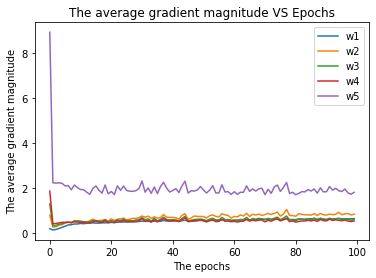

In [43]:
ax = plt.subplot(1, 1, 1)
for i in range(len(nn_quad_8.grad_total)):
    plt.plot(np.abs(nn_quad_8.grad_total[i]), label=f'w{i+1}')
plt.legend()
plt.title('The average gradient magnitude VS Epochs')
plt.ylabel('The average gradient magnitude')
plt.xlabel('The epochs')
plt.show()

In [44]:
tb_68 = mcnemar_table(y_target=y_test, 
                   y_model1=yhat_6, 
                   y_model2=yhat_8)
chi2_68, _ = mcnemar(ary=tb_68, corrected=True)
print(f'The model 7 & the model 8: chi-squared {chi2_68}')

The model 7 & the model 8: chi-squared 0.07492354740061162


In [45]:
tb_78 = mcnemar_table(y_target=y_test, 
                   y_model1=yhat_7, 
                   y_model2=yhat_8)
chi2_78, _ = mcnemar(ary=tb_78, corrected=True)
print(f'The model 7 & the model 8: chi-squared {chi2_78}')

The model 7 & the model 8: chi-squared 0.00141643059490085


&emsp; These chi-squared values all are less than 6.635, so the difference in performance among these models is small. As a result, the five-layer model is similar to the five-layer model with AdaGrad and the five-layer model with AdaM.

&emsp; As we can see from the chi-squared value and graph above, it is obvious that there is only small performance difference between five layer model implementing AdaGrad technique and AdaM technique. However, the graph shows that only approximately 5 or 6 epochs is needed to obtain stable average gradient magnitude.Therefore, we can conduct that there will be further less epochs required to obtain stable high accuracy if we implement AdaM in our five layer model instead of implementing AdaGrad.